In [1]:
import pandas as pd

In [2]:
# Load run info into Dataframes

dfs = {}
runners = ['Ape', "Tank", "Nation"]
for runner in runners:
    dfs[runner] = pd.read_csv(f"./csv/16 Star - {runner}.csv", parse_dates=['started', 'ended'])


# Run Completion

In [3]:
# Get run completion percentage

for runner in runners:
    df = dfs[runner]
    
    totalRuns = df.shape[0]
    completed = df[df['realTime'].notna()].shape[0]
    
    print("Runner:", runner)
    print("Completed Runs:", completed, "/", totalRuns, f"({round(completed / totalRuns, 4) * 100}%)", "\n")


Runner: Ape
Completed Runs: 43 / 171 (25.15%) 

Runner: Tank
Completed Runs: 21 / 198 (10.61%) 

Runner: Nation
Completed Runs: 23 / 497 (4.63%) 



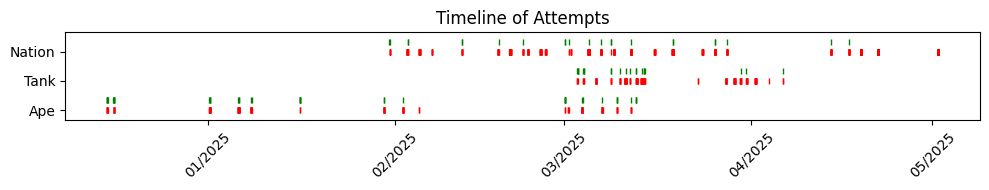

Green = Completed (Not necessarily PB)
Red = Reset


In [4]:
# Plot timeline of run attempts
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Setup the plot
fig, ax = plt.subplots(figsize=(10, 2))


for i in range(len(runners)):
    # Plot all events as line segments at y=0
    df = dfs[runners[i]]
    for _, row in df.iterrows():
        #ax.hlines(y=i, xmin=row['started'], xmax=row['ended'], color='steelblue', linewidth=4)
        completed = pd.notna(row['realTime'])
        if completed:
            ax.plot(row['started'], i*3 + 1, 'g|', markersize= 5)  # start
        else:
            ax.plot(row['started'], i*3, 'r|', markersize= 5)  # start
        #ax.plot(row['ended'], i, 'ro', markersize=5)    # end

# Formatting
ax.set_yticks(range(0, len(runners)*3, 3))  # Hide y-axis ticks
ax.set_yticklabels(runners)
ax.set_ylim(-1, 8) # Optional, for spacing
#ax.set_xlabel('Date')
ax.set_title('Timeline of Attempts')
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Tick at start of each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))  # Format: 10/2024
plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()

print('Green = Completed (Not necessarily PB)\nRed = Reset')


In [5]:
def timeToSecs(timeStr):
    if timeStr == None:
        return None
    output = 0
    times = timeStr.split(':')
    output += 3600 * int(times[0])
    output += 60 * int(times[1])
    output += float(times[2])
    return output
    

In [6]:
completedDfs = {}
pbDfs = {}

for runner in runners:
    df = dfs[runner]
    completedDf = df[df['realTime'].notna()]
    completedDfs[runner] = completedDf


    completedDf['secs'] = completedDf['realTime'].apply(timeToSecs)
    completedDf['pb'] = False


    pb = 9999999
    for i, row in completedDf.iterrows():
        if (row['secs'] < pb):
            completedDf.at[i, 'pb'] = True
            pb = row['secs']

    pbDf = completedDf[completedDf['pb'] == True]
    pbDfs[runner] = pbDf

C:\Users\a\AppData\Local\Temp\ipykernel_15160\3232447169.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completedDf['secs'] = completedDf['realTime'].apply(timeToSecs)
C:\Users\a\AppData\Local\Temp\ipykernel_15160\3232447169.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completedDf['pb'] = False
C:\Users\a\AppData\Local\Temp\ipykernel_15160\3232447169.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

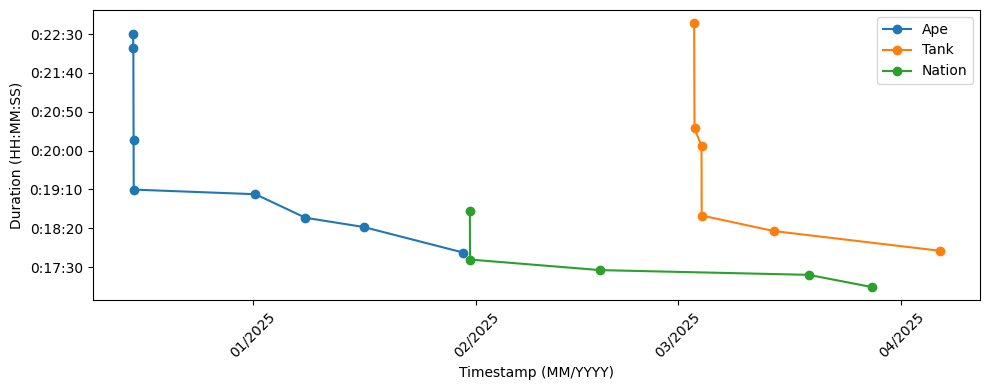

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import timedelta


# Create plot
fig, ax = plt.subplots(figsize=(10, 4))
for runner in runners:
    pbDf = pbDfs[runner]
    timestamps = pbDf['started']
    durations_in_seconds = pbDf['secs']
    ax.plot(timestamps, durations_in_seconds, marker='o', linestyle='-', label=runner)

# Y-axis: Format seconds to HH:MM:SS
def seconds_to_hhmmss(x, pos):
    td = timedelta(seconds=x)
    return str(td)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(seconds_to_hhmmss))

# X-axis: Format as MM/YYYY with ticks at month starts
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

# Rotate labels
plt.xticks(rotation=45)
ax.set_ylabel("Duration (HH:MM:SS)")
ax.set_xlabel("Timestamp (MM/YYYY)")
ax.legend()
plt.tight_layout()
plt.show()